In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns 
import time

In [2]:
speeds = {1 : 7, 3 : 4.8, 4 :3,6 : 3,  2: 2.5, -1:2}

In [3]:
columns = ['n_transfer', 'start_time', 'bus', 'subway', 'rer', 'tramway', 't_trip', 't_sep','day_start','day_end']

In [4]:
path_1 = 'E:/Study/data/1_0.csv'
path_2 = 'E:/Study/data/2_0.csv'
path_3 = 'E:/Study/data/3_0.csv'
path_4 = 'E:/Study/data/4_0.csv'
path_5 = 'E:/Study/data/5_0.csv'
path_6 = 'E:/Study/data/6_0.csv'
path_7 = 'E:/Study/data/7_0.csv'
path_arret = "F:/Stage/data/AFC/DM arret.txt"

In [5]:
def get_counts(anything):
    counts = {}
    for a in anything:
        if a in counts:
            counts[a] = counts[a] + 1
        else:
            counts[a] = 1
    return counts

In [6]:
def get_median(data):
    data.sort()
    half = len(data) // 2
    return (data[half] + data[~half]) / 2

In [7]:
def speed(data):
    v = int(np.sqrt((data['D_x'] - data['O_x'])**2 + (data['D_y'] - data['O_y'])**2 )) / ((data['Dt'] - data['Ot']).seconds+1)
    return v

In [8]:
def change_Ot_time(data):
    return timedelta(hours=int(data['Ot'][6:9]) , minutes = int(data['Ot'][10:12]), seconds = int(data['Ot'][13:15]))
def change_Dt_time(data):
    if pd.isnull(data['Dt']):
        return timedelta(seconds = 0)
    else:
        return timedelta(hours=int(data['Dt'][6:9]) , minutes = int(data['Dt'][10:12]), seconds = int(data['Dt'][13:15]))

In [9]:
def time_prediction(data):
    if data['unkonwn'] == 'no':
        return data['Dt']
    else:
        s = int(np.sqrt((data['D_x'] - data['O_x'])**2 + (data['D_y'] - data['O_y'])**2 )) 
        v = speeds[data['O_mode']]
        t = timedelta(seconds = int(s/v) )
        return data['Ot'] + t
        

In [11]:
columns

['n_transfer',
 'start_time',
 'bus',
 'subway',
 'rer',
 'tramway',
 't_trip',
 't_sep',
 'day_start',
 'day_end']

In [12]:
def get_time_sep(data):
    day_start = data.iloc[0]['Ot'].seconds
    day_end = data.iloc[len(data)-1]['Dt'].seconds
    rer = 0
    bus = 0
    subway = 0
    tramway = 0
    n_transfer = 1
    t_trip = 0
    trip_id = 0
    results = pd.DataFrame(columns=columns)
    t_end = data.iloc[0]['Dt'].seconds
    t_start = data.iloc[0]['Ot'].seconds
    for i in range(1,len(data)):
        mode = data.iloc[i-1]['O_mode']
        if mode == 1:
            rer = rer + 1
        elif mode == 2:
            bus = bus + 1
        elif mode == 3:
            subway = subway + 1
        else:
            tramway = tramway + 1
        t_first = data.iloc[i-1]['Dt'].seconds
        t_second = data.iloc[i]['Ot'].seconds
        sep_time = t_second - t_first
        if sep_time<3600:
            t_end = data.iloc[i]['Dt'].seconds
            n_transfer = n_transfer + 1
        else:
            results.loc[trip_id] = [n_transfer, t_start, bus, subway, rer, tramway, (t_end - t_start), sep_time,day_start,day_end]
            t_start = data.iloc[i]['Ot'].seconds
            t_end = data.iloc[i]['Dt'].seconds
            rer = 0
            bus = 0
            subway = 0
            tramway = 0
            n_transfer =1
            trip_id = trip_id + 1
    return results

In [13]:
arrets = pd.read_csv(path_arret, header=0, delimiter="\t", encoding='latin-1')

In [14]:
data_1 = pd.read_csv(path_1, header=0, delimiter="\t", encoding='latin-1')
data_2 = pd.read_csv(path_2, header=0, delimiter="\t", encoding='latin-1')
data_3 = pd.read_csv(path_3, header=0, delimiter="\t", encoding='latin-1')
data_4 = pd.read_csv(path_4, header=0, delimiter="\t", encoding='latin-1')
data_5 = pd.read_csv(path_5, header=0, delimiter="\t", encoding='latin-1')
data_6 = pd.read_csv(path_6, header=0, delimiter="\t", encoding='latin-1')
data_7 = pd.read_csv(path_7, header=0, delimiter="\t", encoding='latin-1')

In [31]:
finall_result

,trip_id,client_id,date,O,D,Ot,Dt,mode,O_station,D_station,ligne,unkonwn,O_zones,O_x,O_y,D_zones,D_x,D_y,O_mode,D_mode
0,0,99999910079519014654,14/03/2017,Solférino,Saint Exupery,08:38:00,17:11:00,56,180,370,28,d,4,585747.0,123471.0,5,578838.0,121777.0,2,2
1,1,99999910079519014654,14/03/2017,Saint Exupery,Solférino,17:11:00,00:00:00,56,370,180,28,dh,5,578838.0,121777.0,4,585747.0,123471.0,2,2
2,3,99999834312022823315,14/03/2017,GENTILLY,GARE DU NORD,07:44:37,08:04:07,802,30050180201,271007,ND,no,2,600320.0,123859.0,1,601452.0,131164.0,1,1
3,4,99999641142476692661,14/03/2017,MOUTON - DUVERNET,LUXEMBOURG,07:33:08,16:26:50,1,30010038003,30010038039,38,d,1,599470.0,125555.0,1,600271.0,127357.0,2,2
4,5,99999641142476692661,14/03/2017,LUXEMBOURG,MOUTON - DUVERNET,16:26:50,00:00:00,1,30010038039,30010038003,38,dh,1,600271.0,127357.0,1,599470.0,125555.0,2,2
5,6,99999341872786484931,14/03/2017,ECOLE MILITAIRE,OURCQ,00:09:57,15:23:04,1,30030100700,30030220200,ND,d,1,597767.0,128247.0,1,603698.0,131856.0,3,3
6,7,99999341872786484931,14/03/2017,OURCQ,ECOLE MILITAIRE,15:23:04,00:00:00,1,30030220200,30030100700,ND,dh,1,603698.0,131856.0,1,597767.0,128247.0,3,3
7,8,99999319654609556985,14/03/2017,SAINT-JACQUES,NATIONALE,09:20:47,13:32:48,1,30030150900,30030141100,ND,d,1,600044.0,125824.0,1,601933.0,125860.0,3,3
8,9,99999319654609556985,14/03/2017,NATIONALE,SAINT-JACQUES,13:32:48,00:00:00,1,30030141100,30030150900,ND,dh,1,601933.0,125860.0,1,600044.0,125824.0,3,3
9,10,99999279653049637534,14/03/2017,LIEUSAINT-MOISSY,PORT ROYAL,06:43:16,15:57:54,2,682153,30050151200,ND,d,5,617179.0,103107.0,1,600042.0,126617.0,1,1


In [15]:
list_data = [data_2, data_3, data_4, data_5, data_6, data_7]

In [16]:
finall_result = pd.concat(list_data, axis=0, ignore_index=True)

In [17]:
finall_result.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
zones_2 = finall_result[finall_result['O_zones'] == 2]

In [19]:
zones_1 = finall_result[finall_result['O_zones'] == 1]

In [20]:
zones_3 = finall_result[finall_result['O_zones'] == 3]

In [21]:
zones_4 = finall_result[finall_result['O_zones'] == 4]

In [22]:
zones_5 = finall_result[finall_result['O_zones'] == 5]

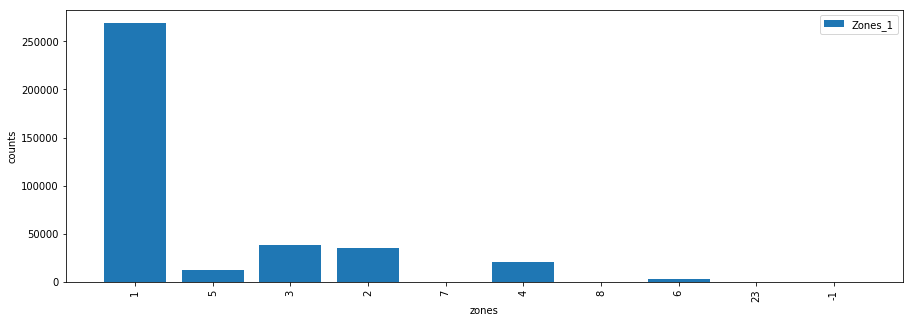

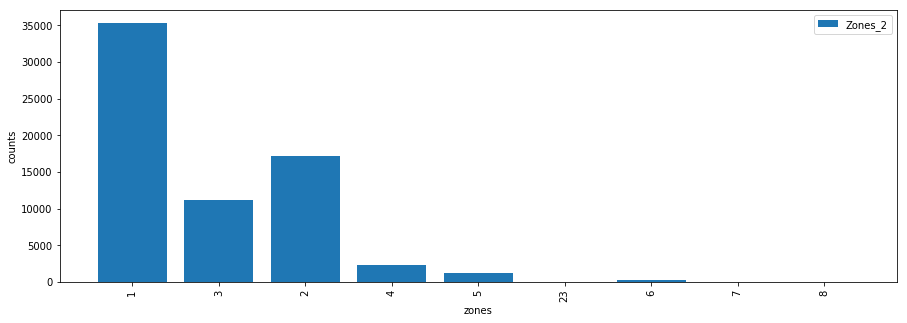

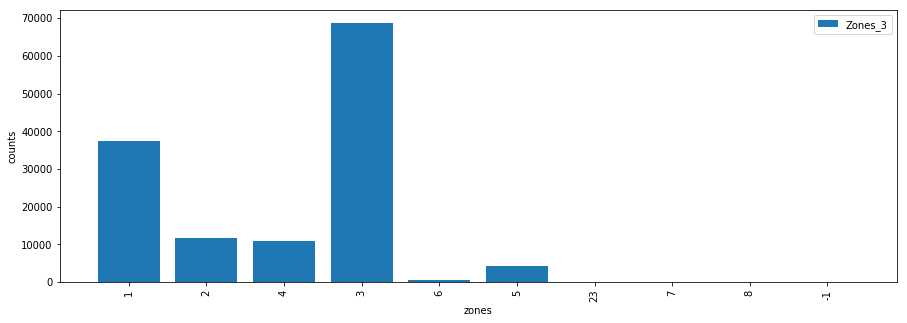

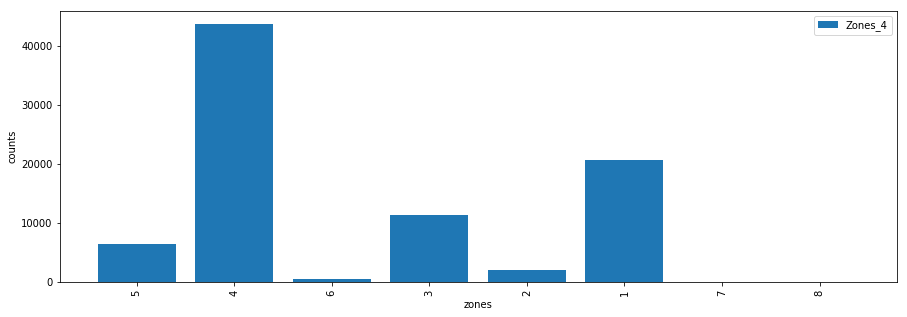

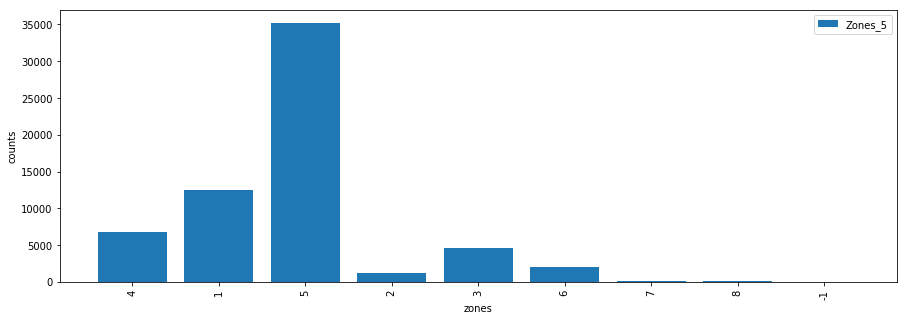

In [23]:
zones_1_counts = get_counts(zones_1['D_zones'])
x = zones_1_counts.keys()
y = zones_1_counts.values()
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('zones')
plt.ylabel('counts')
plt.legend(['Zones_1'])
plt.show()
zones_2_counts = get_counts(zones_2['D_zones'])
x = zones_2_counts.keys()
y = zones_2_counts.values()
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('zones')
plt.ylabel('counts')
plt.legend(['Zones_2'])
plt.show()
zones_3_counts = get_counts(zones_3['D_zones'])
x = zones_3_counts.keys()
y = zones_3_counts.values()
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('zones')
plt.ylabel('counts')
plt.legend(['Zones_3'])
plt.show()
zones_4_counts = get_counts(zones_4['D_zones'])
x = zones_4_counts.keys()
y = zones_4_counts.values()
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('zones')
plt.ylabel('counts')
plt.legend(['Zones_4'])
plt.show()
zones_5_counts = get_counts(zones_5['D_zones'])
x = zones_5_counts.keys()
y = zones_5_counts.values()
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('zones')
plt.ylabel('counts')
plt.legend(['Zones_5'])
plt.show()

In [24]:
get_counts(finall_result['O_mode'])

{-1: 3, 1: 208672, 2: 207815, 3: 309919, 4: 24157, 6: 623}

In [25]:
finall_result['Ot'] = finall_result.apply(change_Ot_time, axis=1)
finall_result['Dt'] = finall_result.apply(change_Dt_time, axis=1)

In [26]:
data_no = finall_result[finall_result['unkonwn'] == 'no']

In [27]:
data_no['speed'] = data_no.apply(speed, axis=1)

E:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
no_speed = data_no['speed']
no_speed.get_values()
y = [a for a in  no_speed.get_values() if (a<50 and a>0)]

In [29]:
get_median(y)

6.9217872217430143

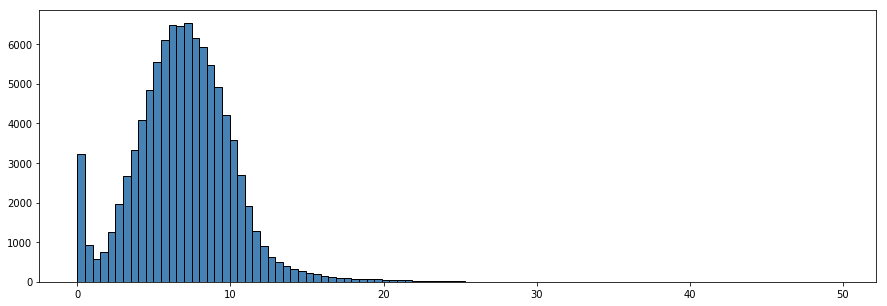

In [30]:
plt.figure(figsize=(15,5))
plt.hist(y, bins=100, color = 'steelblue', edgecolor = 'k',label = 'speed')
plt.show()

In [16]:
finall_result['Dt'] = finall_result.apply(time_prediction, axis=1)

In [166]:
id_s = [a[0] for a in get_counts(finall_result['client_id']).items()]

In [151]:
sep9 = []
for id in id_s[170000:175000]:
    data = finall_result[finall_result['client_id'] == id]
    sep9.extend(get_time_sep(data))

In [77]:
final_sep = []
final_sep.extend(sep2)
final_sep.extend(sep3)
final_sep.extend(sep4)
final_sep.extend(sep5)

In [124]:
final_sep.extend(sep6)

In [130]:
final_sep.extend(sep7)

In [142]:
final_sep.extend(sep8)

In [152]:
final_sep.extend(sep9)

In [158]:
error_data = [f for f in final_sep if f[0]<0]

In [163]:
error_1 = [f[1] for f in error_data]
get_counts(error_1)

{1: 2934, 2: 3463, 3: 1173, 4: 531, 6: 26}

In [170]:
time = []
for a in sep2:
    time.append(a[0])

In [171]:
time = [t for t in time if (t >(-30)  and t<1000) ]
len(time)

4776

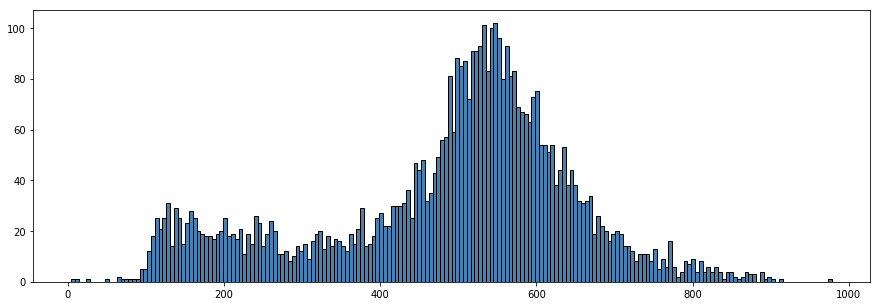

In [172]:
plt.figure(figsize=(15,5))
plt.hist(time, bins=200, color = 'steelblue', edgecolor = 'k',label = 'time')
plt.show()

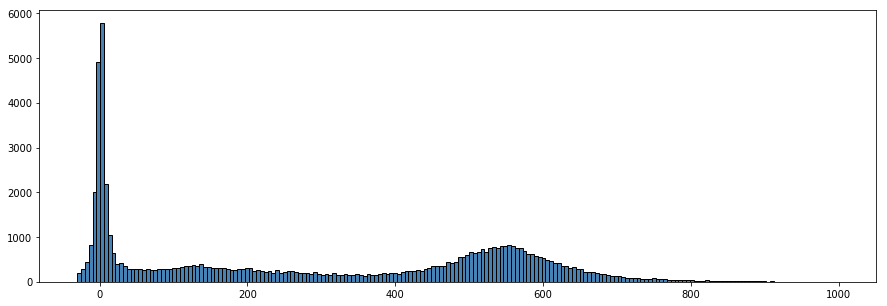

In [157]:
plt.figure(figsize=(15,5))
plt.hist(time, bins=200, color = 'steelblue', edgecolor = 'k',label = 'time')
plt.show()

In [17]:
drop_result = finall_result.drop(finall_result[(finall_result['O'] == finall_result['D'])&(finall_result['Ot'] == finall_result['Dt'])].index)

In [18]:
drop_result = drop_result.drop(drop_result.columns[[0,2,3,4,7,8,9,10,12,13,14,15,16,17]], axis=1)


In [21]:
len(drop_result)

732036

In [22]:
id_s = [a[0] for a in get_counts(drop_result['client_id']).items()]

In [25]:
len(id_s)/5000

43.5356

In [ ]:
m_results = pd.DataFrame()
for i in range(int(len(id_s)/5000)):
    index = i*5000
    test = id_s[index:index+5000]
    for a in test:
        data = drop_result[drop_result['client_id'] == a]
        m_results = m_results.append(get_time_sep(data), ignore_index =True)
    time.sleep(300)
m_results.to_csv('E:/Study/data/final_data.csv', index=False)  

In [14]:
O_counts = get_counts(test_RER['O'])
O_counts = sorted(O_counts.items(), key = lambda item:item[1], reverse=True)
len(O_counts)

46

In [185]:
rer_A = finall_result[finall_result['mode'] == 801]

In [91]:
len(get_counts(rer_A['O']))

46

In [191]:
finall_result[(finall_result['D_mode'] == 1) |(finall_result['O_mode'] == 1)]

,trip_id,client_id,date,O,D,Ot,Dt,mode,O_station,D_station,ligne,unkonwn,O_zones,O_x,O_y,D_zones,D_x,D_y,O_mode,D_mode
26,33,99996834670456162891,14/03/2017,NOISY-CHAMPS,MASSY-PALAISEAU,08:24:09,09:28:30,801,30050260801,30050180602,ND,d,4,617876.0,126963.0,4,594293.0,113752.0,1,1
66,79,99992881956782998475,14/03/2017,NOISY-LE-GRAND-MONT D'EST,SAVIGNY-LE-TEMPLE-NANDY,16:43:06,17:56:11,801,30050260701,682187,ND,no,4,615505.0,126729.0,6,618250.0,99462.0,1,1
113,132,99989170660623269949,14/03/2017,NOISY-LE-GRAND-MONT D'EST,BERAULT-METRO,07:55:56,08:16:59,801,30050260701,30010325032,ND,d,4,615505.0,126729.0,2,606673.0,127251.0,1,2
164,191,99985864111412513744,14/03/2017,LA DEFENSE-GRANDE ARCHE,LA DEFENSE-GRANDE ARCHE,08:23:01,08:23:01,801,30050170401,30050170401,ND,d,3,592703.0,132422.0,3,592703.0,132422.0,1,1
165,192,99985864111412513744,14/03/2017,LA DEFENSE-GRANDE ARCHE,LA DEFENSE-GRANDE ARCHE,14:51:21,14:51:21,801,30050170401,30050170401,ND,dh,3,592703.0,132422.0,3,592703.0,132422.0,1,1
169,197,99985467148143371348,14/03/2017,MAISONS-LAFFITTE,JUZIERS,17:56:20,18:49:57,801,386425,381558,ND,dh,4,585939.0,138396.0,6,564041.0,143660.0,1,1
171,199,99985409634826174137,14/03/2017,VAL-DE-FONTENAY,BALLANCOURT,18:10:33,19:38:20,801,30050260501,681437,ND,dh,3,611129.0,128159.0,6,602510.0,92309.0,1,1
229,267,99979891795970729871,14/03/2017,FONTENAY-SOUS-BOIS,NOGENT-SUR-MARNE,16:10:43,16:22:01,801,30050160202,30050160301,ND,no,3,609334.0,127035.0,3,609921.0,125987.0,1,1
230,268,99979831861459565631,14/03/2017,SAINT-MAUR-CRETEIL,NOGENT-SUR-MARNE,10:02:19,10:10:40,801,30050160401,30050160301,ND,no,3,610003.0,122864.0,3,609921.0,125987.0,1,1
350,405,99968306900839909537,14/03/2017,AUBER,CONVENTION,13:57:37,14:08:31,801,30050060600,30030160500,ND,dh,1,599516.0,130190.0,1,597071.0,126315.0,1,3


In [15]:
x = [a[0] for a in O_counts]
y = [a[1] for a in O_counts]

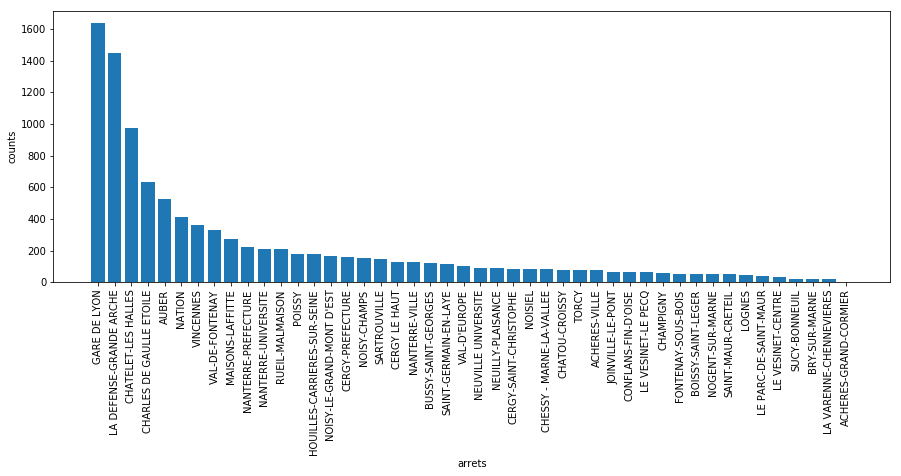

In [16]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(len(x)) , y)
plt.xticks(np.arange(len(x)), x, rotation = 90)
plt.xlabel('arrets')
plt.ylabel('counts')
plt.show()


In [112]:
D_counts = get_counts(test_RER['D'])

In [113]:
D_counts

{'NATION': 2388,
 nan: 699,
 'MASSY-PALAISEAU': 157,
 'SAVIGNY-LE-TEMPLE-NANDY': 90,
 'BERAULT-METRO': 4,
 'PONT DE NEUILLY (AVENUE DE MADRID)': 98,
 'LA DEFENSE-GRANDE ARCHE': 3986,
 'JUZIERS': 3,
 'BALLANCOURT': 8,
 'NOGENT-SUR-MARNE': 295,
 'SAINT-GEORGES - CHATEAUDUN': 5,
 'SAINT-LAZARE': 585,
 'CONVENTION': 34,
 'POISSY': 357,
 'GARE DE LYON': 3836,
 'AUBER': 2939,
 'CHATOU-CROISSY': 262,
 'MAULE': 1,
 'HOUILLES-CARRIERES-SUR-SEINE': 444,
 'ROISSY-EN-BRIE': 31,
 'PICPUS': 28,
 'Lovr-Bruxell': 1,
 'OLYMPIADES': 203,
 'SAINT-GERMAIN-DES-PRES': 12,
 'CHARLES DE GAULLE ETOILE': 2534,
 'GRANDS BOULEVARDS (RUE MONTMARTRE)': 72,
 'MELUN': 14,
 "Gare d'Aulnay sous Bois": 18,
 'NANTERRE-PREFECTURE': 689,
 'LE VESINET-LE PECQ': 217,
 'STADE LEO LAGRANGE': 1,
 'CERGY LE HAUT': 333,
 'SARTROUVILLE': 460,
 'CITE UNIVERSITAIRE': 143,
 'LA PLAINE-STADE DE FRANCE': 162,
 'LE PELETIER': 55,
 'CHATELET-LES HALLES': 2218,
 'PANTIN': 33,
 'BIBLIOTHEQUE FRANCOIS MITTERRAND': 587,
 'COMBS-LA-VILLE-QUIN

In [114]:
len(D_counts)

2078

In [17]:
counts_counts = get_counts(get_counts(finall_result['client_id']).values())

In [18]:
y_counts = sorted(counts_counts.values(), reverse = True)
y_counts[0] = y_counts[0] * 2
y_counts[1] = y_counts[1] * 3
y_counts[2] = y_counts[2] * 4
y_counts[3] = y_counts[3] * 5
y_counts[4] = y_counts[4] * 6
y_counts[5] = y_counts[5] * 7
y_counts

IndexError: list index out of range

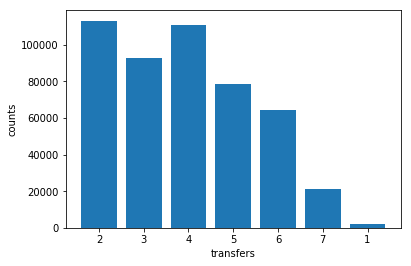

In [91]:
plt.bar(np.arange(len(counts_counts)) ,y_counts)
plt.xticks(np.arange(len(counts_counts)), [2,3,4,5,6,7,1])
plt.xlabel('transfers')
plt.ylabel('counts')
plt.show()

# Validation -> Transfer

In [108]:
id_counts = get_counts(finall_result['client_id'])
counts = []
for a in id_counts.keys():
    temp = finall_result[finall_result['client_id'] == a ]
    counts.extend((get_counts(temp['trip_id'])).values())


KeyboardInterrupt: 